<a href="https://colab.research.google.com/github/yunseo4401/start/blob/master/randomForest_classifier_Rgressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
breast=pd.read_csv('brest_cancer.txt',sep=',')

In [4]:
breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
breast['diagnosis'].value_counts()
#B,M 이중분류 모델을 만들자 

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
breast['diagnosis']=np.where(breast['diagnosis']=='M',1,0)  #M이면 1 아니면 0 
features=['area_mean','texture_mean'] #두가지만 사용하자 


x=breast[features]
y=breast['diagnosis']
train_input,test_input,train_target,test_target=train_test_split(x,y,test_size=0.3,random_state=1)

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,min_samples_split=5)
clf.fit(train_input,train_target)
pred=clf.predict(test_input)
print('정확도',clf.score(test_input,test_target))

정확도 0.8713450292397661


In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

pred=clf.predict(test_input)
test_cm=confusion_matrix(test_target,pred)
test_acc=accuracy_score(test_target,pred)
test_prc=precision_score(test_target,pred)
test_rcll=recall_score(test_target,pred)
test_f1=f1_score(test_target,pred)

print(test_cm)
print(test_acc)
print(test_prc)
print(test_rcll)
print(test_f1)

[[99  9]
 [13 50]]
0.8713450292397661
0.847457627118644
0.7936507936507936
0.819672131147541


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


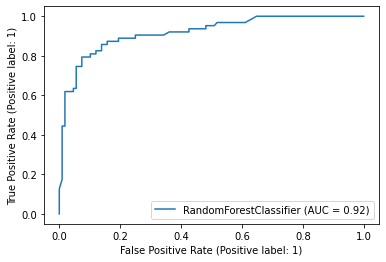

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve,roc_auc_score
plot_roc_curve(clf,test_input,test_target)
plt.show()

In [11]:
#변수중요도 
importances=clf.feature_importances_
column_nm=pd.DataFrame(['area_mean','texture_mean'])
feature_importances=pd.concat([column_nm,pd.DataFrame(importances)],axis=1)
feature_importances.columns=['feaure_nm','importances']
print(feature_importances)

      feaure_nm  importances
0     area_mean     0.694139
1  texture_mean     0.305861


<BarContainer object of 2 artists>

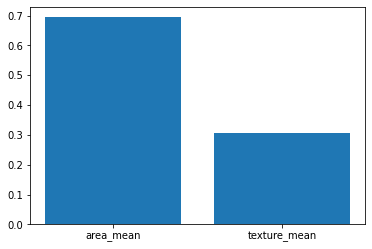

In [12]:
f=features
xtick_label_position=list(range(len(f)))
plt.xticks(xtick_label_position,f)
plt.bar([x for x in range(len(importances))],importances)

In [13]:
#랜덤포레스트 회귀 
car=pd.read_csv('car_price.txt',sep=',')
car
#가격을 예측하는 회귀모델을 만들어보자 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [14]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [16]:
car_num=car.select_dtypes(['number']) #연속형 변수인 칼럼만 담기 
features=list(car_num.columns.difference(['car_ID','symboling','price']))
x=car_num[features]
y=car_num['price']


In [17]:
train_input,test_input,train_target,test_target=train_test_split(x,y,test_size=0.3,random_state=1)

print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(143, 13) (143,)
(62, 13) (62,)


In [19]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(train_input,train_target)
pred=reg.predict(test_input)


In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


mse=mean_squared_error(test_target,pred)
mae=mean_absolute_error(test_target,pred)
rmse=np.sqrt(mse)
acc=reg.score(test_input,test_target)

print(mse)
print(mae)
print(rmse)
print(acc)


3966139.0280582313
1313.1218411827958
1991.5167656985043
0.9343034900853121


In [24]:
#변수중요도 
importances=reg.feature_importances_
column_nm=pd.DataFrame(features)
feature_importances=pd.concat([column_nm,pd.DataFrame(importances)],axis=1)
feature_importances.columns=['feaure_nm','importances']
print(feature_importances)

           feaure_nm  importances
0          boreratio     0.003687
1          carheight     0.003821
2          carlength     0.005695
3           carwidth     0.018676
4            citympg     0.003999
5   compressionratio     0.003593
6         curbweight     0.205426
7         enginesize     0.673505
8         highwaympg     0.036802
9         horsepower     0.024426
10           peakrpm     0.006829
11            stroke     0.004255
12         wheelbase     0.009285
